In [1]:
import pandas as pd
import numpy as np
import os
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 

In [2]:
os.listdir("most rated")

['Test-1542969243754.csv',
 'Test_Beneficiarydata-1542969243754.csv',
 'Test_Inpatientdata-1542969243754.csv',
 'Test_Outpatientdata-1542969243754.csv',
 'Train-1542865627584.csv',
 'Train_Beneficiarydata-1542865627584.csv',
 'Train_Inpatientdata-1542865627584.csv',
 'Train_Outpatientdata-1542865627584.csv']

In [3]:
Train_Beneficiarydata=pd.read_csv("most rated/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("most rated/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("most rated/Train_Outpatientdata-1542865627584.csv")
Train=pd.read_csv("most rated/Train-1542865627584.csv")

In [4]:
print(Train_Beneficiarydata.columns,f'\nTotal values: {len(Train_Beneficiarydata)}')

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object') 
Total values: 138556


In [5]:
print(Train_Inpatientdata.columns,f'\nTotal values: {len(Train_Inpatientdata)}')

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object') 
Total values: 40474


In [6]:
print(Train_Outpatientdata.columns,f'\nTotal values: {len(Train_Outpatientdata)}')

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object') 
Total values: 517737


In [7]:
print(Train.columns,f'\nTotal values: {len(Train)}')

Index(['Provider', 'PotentialFraud'], dtype='object') 
Total values: 5410


### Feature Engineering

In [8]:
TODAY = pd.to_datetime("2020-12-31")
Train_Beneficiarydata["DOB"] = pd.to_datetime(Train_Beneficiarydata["DOB"])
Train_Beneficiarydata["DOD"] = pd.to_datetime(Train_Beneficiarydata["DOD"], errors='coerce')
Train_Beneficiarydata["Age"] = (
    (Train_Beneficiarydata["DOD"].fillna(TODAY) - Train_Beneficiarydata["DOB"])
    .dt.days//365 
)

Train_Inpatientdata["ClaimStartDt"]= pd.to_datetime(Train_Inpatientdata["ClaimStartDt"])
Train_Inpatientdata["ClaimEndDt"]= pd.to_datetime(Train_Inpatientdata["ClaimEndDt"])
Train_Inpatientdata["ClaimPeriod"] = (
    (Train_Inpatientdata["ClaimEndDt"] - Train_Inpatientdata["ClaimStartDt"])
    .dt.days
)
Train_Inpatientdata["AdmissionPeriod"] = (
    (Train_Inpatientdata["ClaimEndDt"] - Train_Inpatientdata["ClaimStartDt"])
    .dt.days
)

Train_Outpatientdata["ClaimStartDt"]= pd.to_datetime(Train_Outpatientdata["ClaimStartDt"])
Train_Outpatientdata["ClaimEndDt"]= pd.to_datetime(Train_Outpatientdata["ClaimEndDt"])
Train_Outpatientdata["ClaimPeriod"] = (
    (Train_Outpatientdata["ClaimEndDt"] - Train_Outpatientdata["ClaimStartDt"])
    .dt.days
)


Train_Beneficiarydata=Train_Beneficiarydata.drop(columns=['DOB','DOD'])
Train_Inpatientdata=Train_Inpatientdata.drop(columns=['ClaimStartDt','ClaimEndDt','DischargeDt','AdmissionDt'])
Train_Outpatientdata=Train_Outpatientdata.drop(columns=['ClaimStartDt','ClaimEndDt'])

In [9]:
Train_Inpatientdata.isnull().sum()

BeneID                        0
ClaimID                       0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
ClaimPeriod                   0
AdmissionPeriod               0
dtype: int64

In [10]:
Train_Outpatientdata.isnull().sum()

BeneID                         0
ClaimID                        0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
ClaimPeriod                    0
dtype: int64

In [11]:
number_cols = [f'ClmProcedureCode_{i}' for i in range(1, 7)]
target_cols = number_cols + ['DeductibleAmtPaid']
print(target_cols)

['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid']


In [12]:
Train_Inpatientdata[target_cols] = Train_Inpatientdata[target_cols].fillna(0)
Train_Outpatientdata[target_cols]= Train_Outpatientdata[target_cols].fillna(0)

In [13]:
object_cols = [f'ClmDiagnosisCode_{i}' for i in range(1, 11)] +['AttendingPhysician','OperatingPhysician','OtherPhysician']
Train_Inpatientdata[object_cols] = Train_Inpatientdata[object_cols].fillna('0')
Train_Outpatientdata[object_cols + ['ClmAdmitDiagnosisCode']]= Train_Outpatientdata[object_cols + ['ClmAdmitDiagnosisCode']].fillna('0')

In [14]:
print("Beneficiary Data:",Train_Beneficiarydata.dtypes)
print("\nInpatient Data:",Train_Inpatientdata.dtypes)
print("\nOutpatient Data:",Train_Outpatientdata.dtypes)

Beneficiary Data: BeneID                             object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt            int64
OPAnnualDeductibleAmt               int64
Age             

In [15]:
InpatientData_merged = Train_Inpatientdata.merge(Train_Beneficiarydata, on='BeneID', how='left')
print(f"{len(InpatientData_merged):,}")

40,474


In [16]:
InpatientData_merged.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimPeriod,AdmissionPeriod,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,0,0,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,0.0,6,6,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,78
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,0,6186,1068.0,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,0.0,2,2,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,78
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,0,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,78
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,0,331.0,0.0,0.0,0.0,0.0,0.0,8,8,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,106
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,0,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,0,3893.0,0.0,0.0,0.0,0.0,0.0,17,17,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,82


In [17]:
OutpatientData_merged = Train_Outpatientdata.merge(Train_Beneficiarydata ,on='BeneID', how='left')
print(f"{len(OutpatientData_merged):,}")

517,737


In [18]:
OutpatientData_merged.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,ClaimPeriod,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11002,CLM624349,PRV56011,30,PHY326117,0,0,78943,V5866,V1272,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,56409,0,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,84
1,BENE11003,CLM189947,PRV57610,80,PHY362868,0,0,6115,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,79380,0,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,84
2,BENE11003,CLM438021,PRV57595,10,PHY328821,0,0,2723,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,84
3,BENE11004,CLM121801,PRV56011,40,PHY334319,0,0,71988,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,98
4,BENE11004,CLM150998,PRV56011,200,PHY403831,0,0,82382,30000,72887,4280,7197,V4577,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,71947,0,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,98


In [19]:
def unique_value_distribution(df):
    print("Unique value count per column:\n")
    for col in df.columns:
        unique_vals = df[col].nunique()
        print(f"{col}: {unique_vals} unique values")

In [20]:
unique_value_distribution(InpatientData_merged)
unique_value_distribution(OutpatientData_merged)

Unique value count per column:

BeneID: 31289 unique values
ClaimID: 40474 unique values
Provider: 2092 unique values
InscClaimAmtReimbursed: 146 unique values
AttendingPhysician: 11605 unique values
OperatingPhysician: 8288 unique values
OtherPhysician: 2878 unique values
ClmAdmitDiagnosisCode: 1928 unique values
DeductibleAmtPaid: 2 unique values
DiagnosisGroupCode: 736 unique values
ClmDiagnosisCode_1: 2254 unique values
ClmDiagnosisCode_2: 2440 unique values
ClmDiagnosisCode_3: 2428 unique values
ClmDiagnosisCode_4: 2442 unique values
ClmDiagnosisCode_5: 2375 unique values
ClmDiagnosisCode_6: 2359 unique values
ClmDiagnosisCode_7: 2311 unique values
ClmDiagnosisCode_8: 2244 unique values
ClmDiagnosisCode_9: 2095 unique values
ClmDiagnosisCode_10: 953 unique values
ClmProcedureCode_1: 1118 unique values
ClmProcedureCode_2: 298 unique values
ClmProcedureCode_3: 155 unique values
ClmProcedureCode_4: 49 unique values
ClmProcedureCode_5: 7 unique values
ClmProcedureCode_6: 1 unique valu

In [21]:
from IPython.display import HTML, display

def make_df_sticky(df):
    """
    Renders a pandas DataFrame as HTML with a sticky index column.
    """
    html = df.to_html()
    css = """
    <style>
        .dataframe {
            border-collapse: collapse;
        }
        .dataframe th:first-child, .dataframe td:first-child {
            position: sticky;
            left: 0;
            background-color: white; 
            z-index: 10;
            border-right: 1px solid #e0e0e0; 
        }
    </style>
    """
    display(HTML(css + html))

In [22]:
make_df_sticky(InpatientData_merged.describe())

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimPeriod,AdmissionPeriod,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.0,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000
mean,10087.884074,1044.277808,3371.262366,552.991748,100.766739,11.665267,1.171740,0.0,5.660251,5.660251,1.574863,1.248752,25.392573,377.385136,11.915402,11.922642,1.495948,1.278179,1.398231,1.809038,1.520853,1.497776,1.197954,1.143302,1.648441,1.639645,1.830163,17528.645056,1887.461234,1897.183130,529.319390,84.614641
std,10303.099402,157.394952,3718.180908,1586.759059,734.744727,242.171204,87.754729,0.0,5.628873,5.628873,0.494370,0.698123,15.235985,266.417759,0.987961,0.879923,0.499990,0.448107,0.489540,0.393064,0.499571,0.500001,0.398462,0.350385,0.477463,0.480109,0.375495,17562.156402,1686.848629,3949.299161,948.130843,13.204292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,0.000000,37.000000
25%,4000.000000,1068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,2.000000,1.000000,1.000000,11.000000,150.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6000.000000,1068.000000,190.000000,40.000000,79.000000
50%,7000.000000,1068.000000,3322.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000000,4.000000,2.000000,1.000000,25.000000,342.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,12000.000000,1068.000000,730.000000,210.000000,86.000000
75%,12000.000000,1068.000000,7817.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.000000,7.000000,2.000000,1.000000,38.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,22000.000000,2136.000000,2020.000000,610.000000,94.000000
max,125000.000000,1068.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,0.0,36.000000,36.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,112.000000


In [23]:
make_df_sticky(OutpatientData_merged.describe())

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClaimPeriod,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.0,517737.0,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000
mean,286.334799,1.913889,0.313128,0.022861,0.015744,0.0,0.0,2.779233,1.420532,1.579149,1.255500,25.451221,378.682244,11.932728,11.940031,1.606120,1.419844,1.602833,1.851708,1.700064,1.570463,1.302161,1.248352,1.685004,1.692674,1.903605,4266.368446,465.667318,2308.013258,659.109380,84.248253
std,694.034343,122.157934,42.823805,9.368375,10.904427,0.0,0.0,15.785839,4.707387,0.493696,0.718923,15.189408,265.121345,0.881558,0.778058,0.488609,0.493534,0.489312,0.355389,0.458230,0.495010,0.459195,0.432057,0.464515,0.461386,0.295132,10626.011381,1063.078487,3874.948920,1005.505705,13.029054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,0.000000,0.000000,36.000000
25%,40.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,11.000000,150.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,490.000000,130.000000,79.000000
50%,80.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.000000,1.000000,24.000000,350.000000,12.000000,12.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1200.000000,350.000000,85.000000
75%,200.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.000000,1.000000,38.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4000.000000,1068.000000,2630.000000,800.000000,93.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,0.0,0.0,897.000000,23.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,112.000000


C:\Users\rajbh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


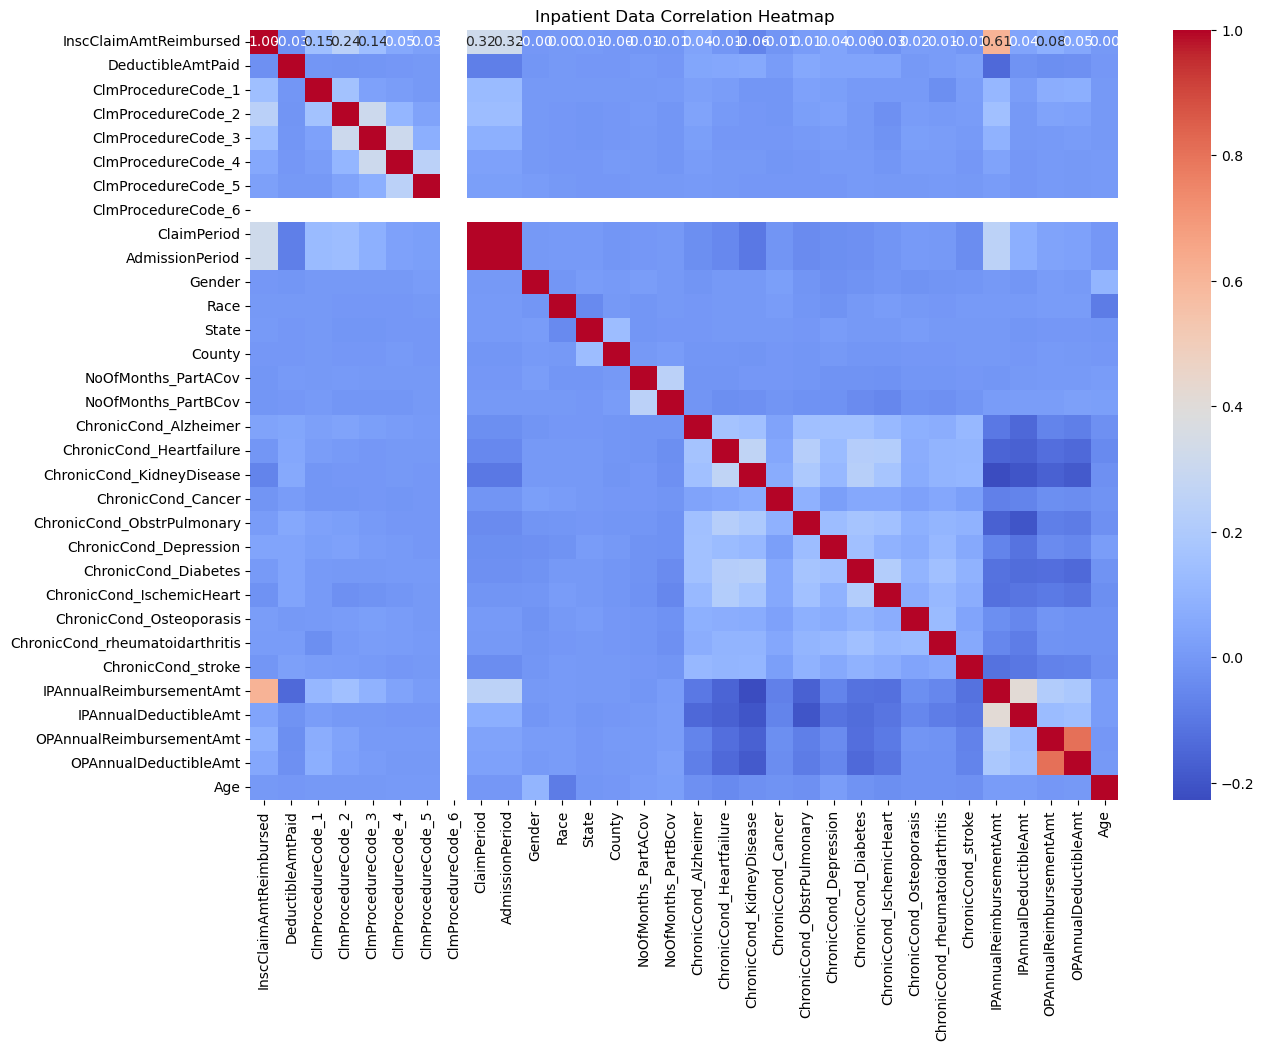

In [25]:
numeric_cols_inp = InpatientData_merged.select_dtypes(include='number')
numeric_cols_out = OutpatientData_merged.select_dtypes(include='number')

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols_inp.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Inpatient Data Correlation Heatmap")
plt.show()

C:\Users\rajbh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


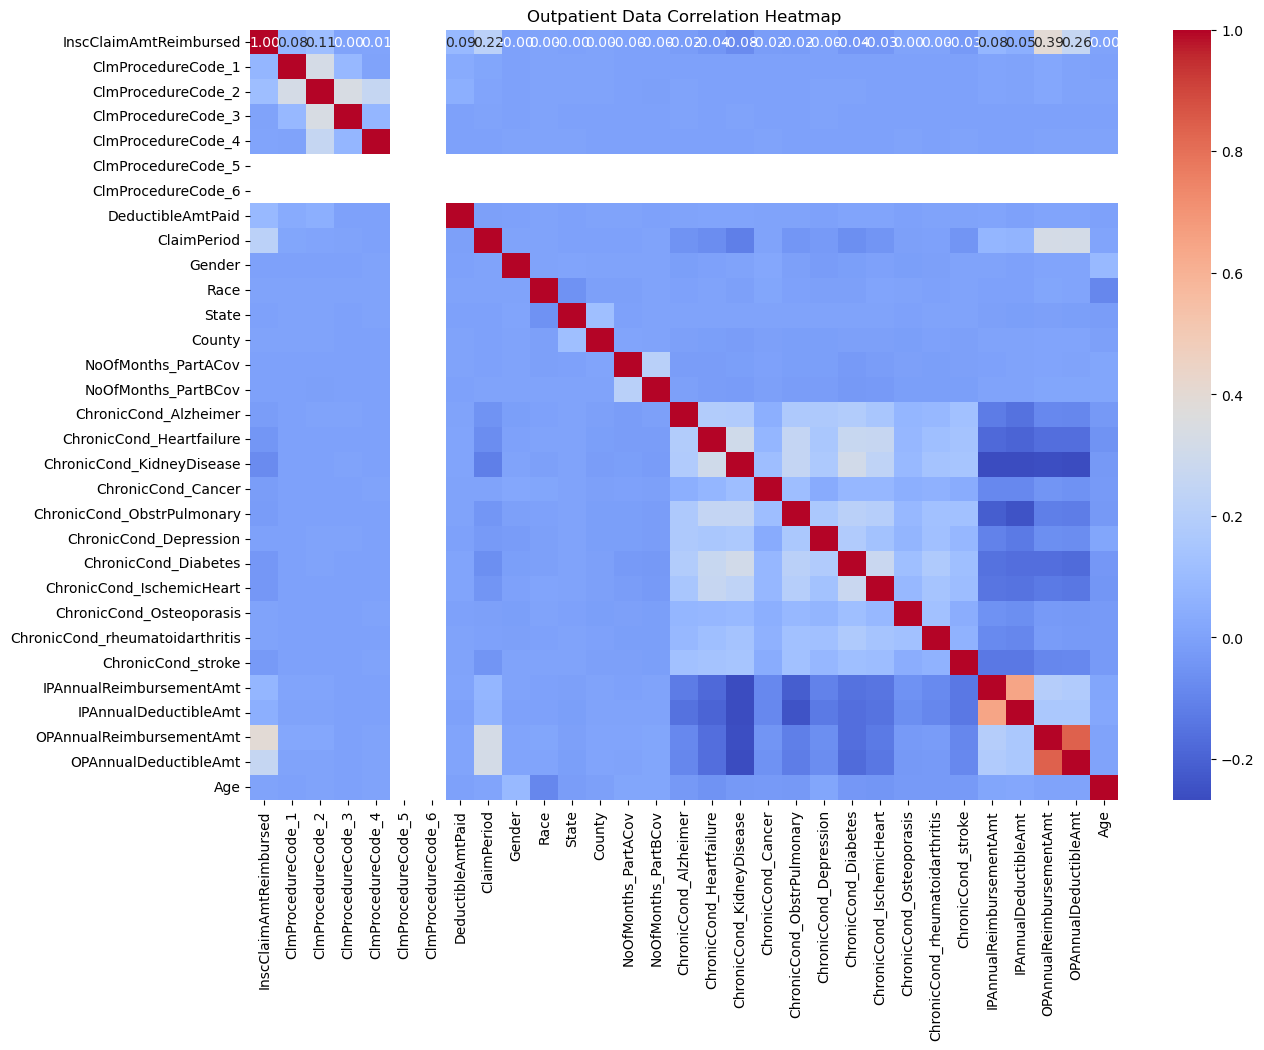

In [27]:
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols_out.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Outpatient Data Correlation Heatmap")
plt.show()

In [34]:
def plot_distributions(df):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.histplot(data=df, x='Age', ax=axes[0])
    axes[0].set_title("Age Distribution")
    sns.histplot(data=df, x='ClaimPeriod', bins=30,ax=axes[1])
    axes[1].set_title("Claim Period Distribution")
    plt.tight_layout()
    plt.show()

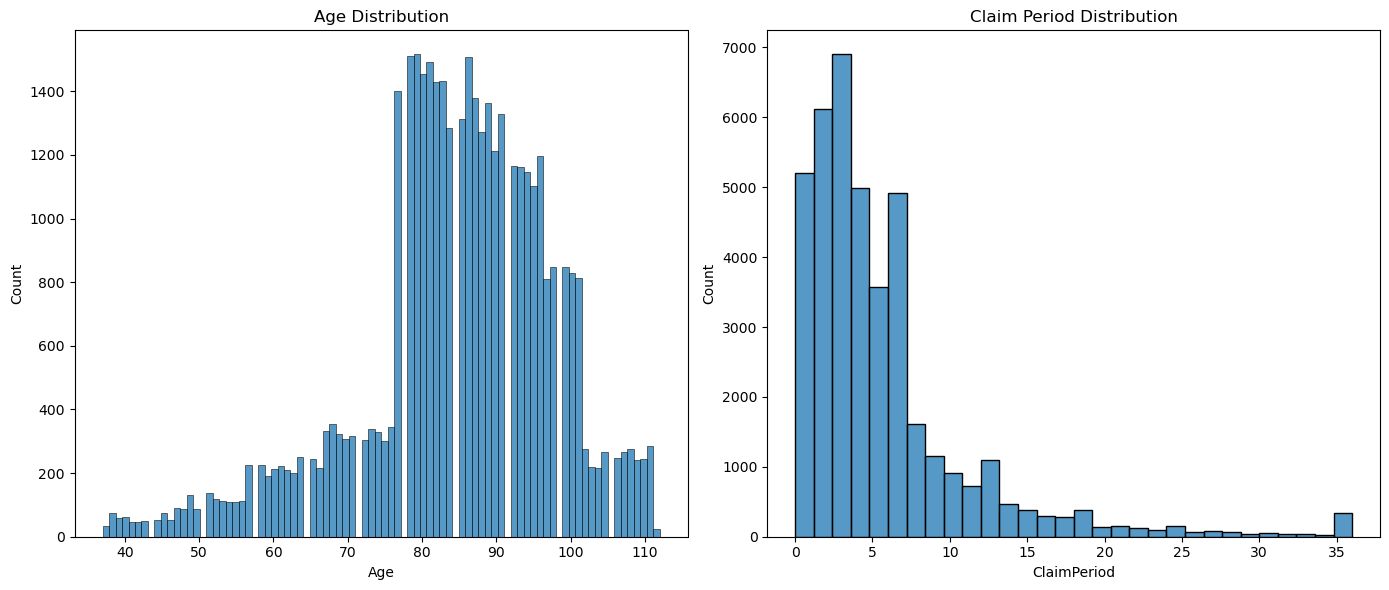

In [35]:
plot_distributions(InpatientData_merged)

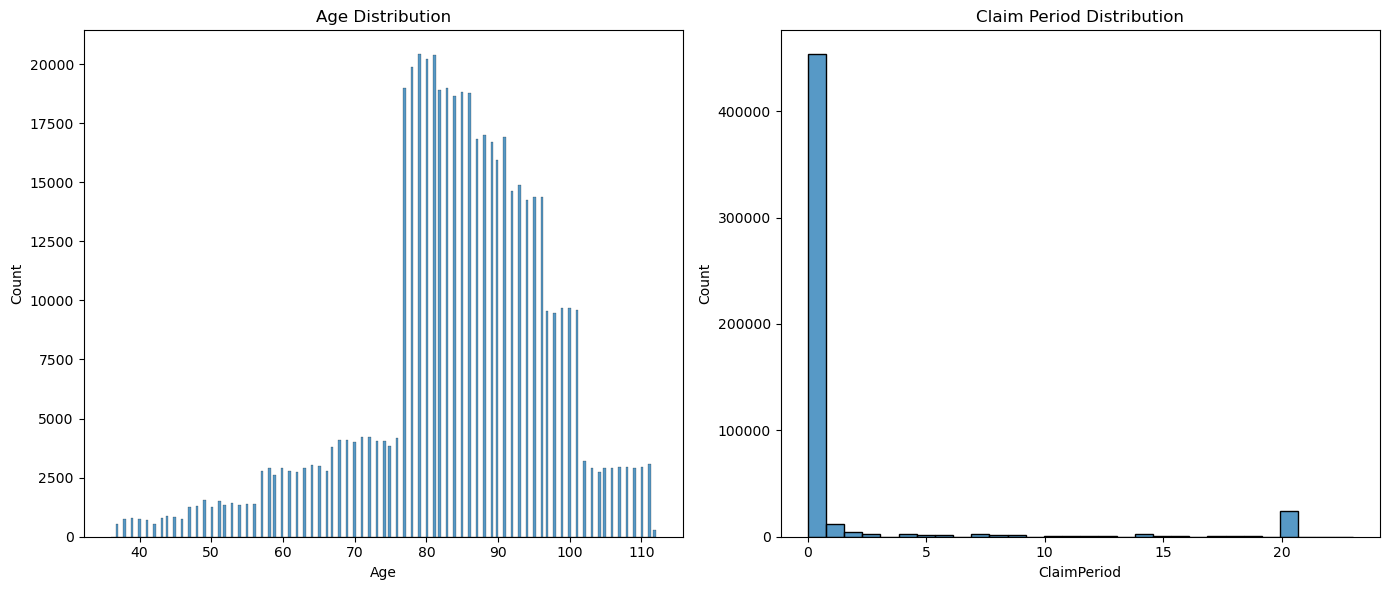

In [36]:
plot_distributions(OutpatientData_merged)